# Time Series Forecasting with LSTM-generator

In this assigment, we are using RNN based LSTM Generator to predict next months alcohol sales based on the current month (as in the dataset). The alcohol sales range from year 1992 to 2019.

Find more details about the dataset - https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=S4248SM144NCEN&scale=left&cosd=1992-01-01&coed=2020-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2020-03-30&revision_date=2020-03-30&nd=1992-01-01

Let's import libraries starting with pandas, numpy, matplotlib and seaborn. **

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os


Download the dataset by clicking on the generated link below:

In [2]:
print("\nClick on the link below to download the excel datasheet")
!echo 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=S4248SM144NCEN&scale=left&cosd=1992-01-01&coed=2020-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2020-03-30&revision_date=2020-03-30&nd=1992-01-01'


Click on the link below to download the excel datasheet
https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=S4248SM144NCEN&scale=left&cosd=1992-01-01&coed=2020-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2020-03-30&revision_date=2020-03-30&nd=1992-01-01


Read the data, set 'date' as the column index and set the table index frequency to 'MS'

In [3]:
table = pd.read_csv('../input/S4248SM144NCEN.csv', index_col= 'DATE', parse_dates=True)
table.index.freq = 'MS'
table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 328 entries, 1992-01-01 to 2019-04-01
Freq: MS
Data columns (total 1 columns):
S4248SM144NCEN    328 non-null int64
dtypes: int64(1)
memory usage: 5.1 KB


Rename the table column to 'Alcohol Sales'

In [4]:
table.columns= ['Alcohol Sales']

Peint the first few records from the table

In [5]:
table.head()

,Alcohol Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [6]:
print('The lenght of the dataframe table is:', len(table))

The lenght of the dataframe table is: 328


Bifurcate the 328 columns of data into training and testing data.
Set 316 records for training data
set the rest i.e 12 records as  testing ( Split ratio maintained to 80:20)

In [7]:
traindata = table.iloc[:316]
testdata = table.iloc[316:]
testdata= testdata[0:12]

Printing the test data along with the description of the test data. Head() shows you the first few records in the data.

In [8]:
print('Printing the test data', testdata)

Printing the test data             Alcohol Sales
DATE                     
2018-05-01          14138
2018-06-01          14583
2018-07-01          12640
2018-08-01          14257
2018-09-01          12396
2018-10-01          13914
2018-11-01          14174
2018-12-01          15504
2019-01-01          10768
2019-02-01          11134
2019-03-01          12653
2019-04-01          13258


In [9]:
print('Print the information of test data')
testdata.info()

Print the information of test data
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2018-05-01 to 2019-04-01
Freq: MS
Data columns (total 1 columns):
Alcohol Sales    12 non-null int64
dtypes: int64(1)
memory usage: 192.0 bytes


A simple plot using matplotlib library, showing the distribution of data in the latent space.

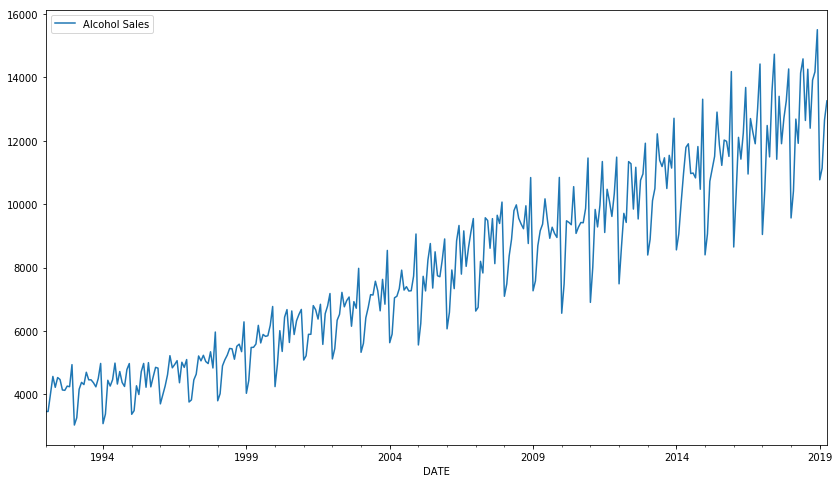

In [10]:
table.plot(figsize=(14,8))
plt.savefig('/kaggle/working/totaldataviz.png')

Printing the histogram of Alcohol sales using 15 bins. ( More bins can can be added or subtracted from the total)

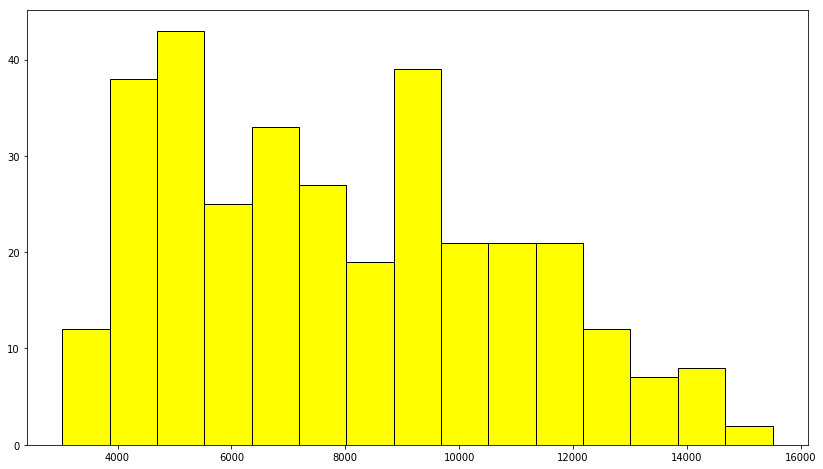

In [36]:
plt.figure(figsize=(14,8))
plt.hist(table['Alcohol Sales'],
         facecolor='yellow',
         edgecolor='black',
         bins=15)
plt.savefig('/kaggle/working/histogram.png')
plt.show()

As we can see, we have 17 years sale data. And this data is acting like time series data which allows predictions for the next month based on the instance of the current month.

The library 'Seasonal Decompose' from Statsmodels.tsa.seasonal allows to visualize the column in 4 different categories such as 'Residual' , 'Seasonal', 'Trend' and 'Observed'.

<Figure size 1008x576 with 0 Axes>

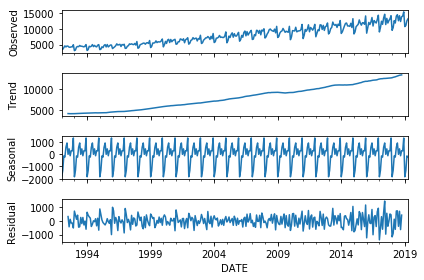

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
combination= seasonal_decompose(table['Alcohol Sales'])
plt.figure(figsize=(14,8))
combination.plot();


We use the minmaxsacler to fit the train data in the ranges (0,1) so that no value falls out of the bound.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(traindata)

MinMaxScaler(copy=True, feature_range=(0, 1))

Transform the scaled train data.

In [14]:
scaled_train = scaler.transform(traindata)
print(scaled_train)

[[0.03658432]
 [0.03649885]
 [0.08299855]
 [0.13103684]
 [0.1017181 ]
 [0.12804513]
 [0.12266006]
 [0.09453799]
 [0.09359774]
 [0.10496624]
 [0.10334217]
 [0.16283443]
 [0.        ]
 [0.0196598 ]
 [0.09650397]
 [0.11505257]
 [0.10906915]
 [0.14231986]
 [0.12197624]
 [0.12189076]
 [0.11394136]
 [0.10300026]
 [0.12556629]
 [0.16608257]
 [0.00376101]
 [0.02957518]
 [0.12069408]
 [0.10513719]
 [0.12214719]
 [0.16702282]
 [0.11052227]
 [0.14428584]
 [0.11479614]
 [0.10402599]
 [0.14984187]
 [0.16582614]
 [0.02897684]
 [0.03872126]
 [0.10582101]
 [0.08231473]
 [0.14394393]
 [0.16608257]
 [0.10188905]
 [0.16830498]
 [0.10291478]
 [0.13018207]
 [0.15556885]
 [0.15343192]
 [0.0570989 ]
 [0.08137448]
 [0.10522267]
 [0.1357381 ]
 [0.18702453]
 [0.15428669]
 [0.16326182]
 [0.17360458]
 [0.11402684]
 [0.16933071]
 [0.15548337]
 [0.17659629]
 [0.06214206]
 [0.06786905]
 [0.12163433]
 [0.13710574]
 [0.18625524]
 [0.17317719]
 [0.18805026]
 [0.17121121]
 [0.16574066]
 [0.19753825]
 [0.1538593 ]
 [0.25

Tranform the scaled test data and print the data. 

In [15]:
scaled_test = scaler.transform(testdata) 
print(scaled_test)

[[0.94939738]
 [0.98743482]
 [0.82135225]
 [0.95956919]
 [0.80049577]
 [0.93025045]
 [0.95247457]
 [1.0661595 ]
 [0.66133858]
 [0.6926233 ]
 [0.82246346]
 [0.87417728]]


TimeSeriesGenerator --- Utility class for generating batches of temporal data.

This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, length of history, etc., to produce batches for training/validation. Then print the length of scalar transformed data. 

In [16]:
from keras.preprocessing.sequence import TimeseriesGenerator
print('The length of scalar transformed training data:', len(scaled_train))

Using TensorFlow backend.


The length of scalar transformed training data: 316


In [17]:
print('The lenght of scalar transformed testing data:', len(scaled_test))

The lenght of scalar transformed testing data: 12


Now, we will start to create LSTM model for forecasting.

Import sequential, dense and LSTM from keras libraries and define class_input and class_feature.
put the scaled train data in the time series generator and put everything in the traingen data. 

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
class_input = 12
class_feature = 1

traingen = TimeseriesGenerator(scaled_train,scaled_train,length=class_input, batch_size=1)

Load the sequential model and add LSTM layers with 128 filters and put return sequences as TRUE and FALSE. Add dense layer before model.compile()

In [19]:
model = Sequential()

model.add(LSTM(128,activation = 'relu', input_shape= (class_input, class_feature), return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Plot_model is the library used to generate and save the model to the code block. 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 128)           66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 128)           131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 329,857
Trainable params: 329,857
Non-trainable params: 0
_________________________________________________________________


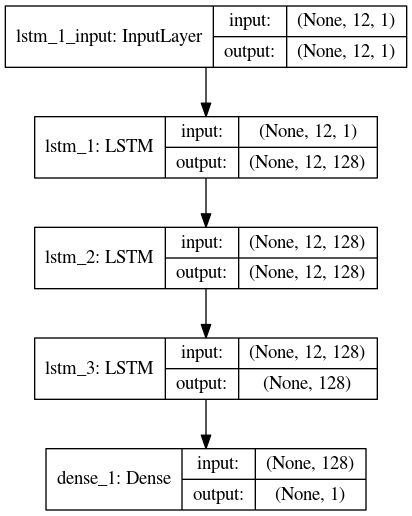

In [20]:
from keras.utils import plot_model
model.summary()
plot_model(model, to_file='/kaggle/working/model.png', show_shapes=True,show_layer_names=True)

In [21]:
model.fit_generator(traingen,epochs= 50)

Epoch 1/50
304/304 [==============================] - 7s 22ms/step - loss: 0.0191
Epoch 2/50
304/304 [==============================] - 6s 18ms/step - loss: 0.0110
Epoch 3/50
304/304 [==============================] - 6s 18ms/step - loss: 0.0097
Epoch 4/50
304/304 [==============================] - 6s 19ms/step - loss: 0.0085
Epoch 5/50
304/304 [==============================] - 6s 18ms/step - loss: 0.0092
Epoch 6/50
304/304 [==============================] - 6s 18ms/step - loss: 0.0057
Epoch 7/50
304/304 [==============================] - 6s 19ms/step - loss: 0.0047
Epoch 8/50
304/304 [==============================] - 6s 19ms/step - loss: 0.0039
Epoch 9/50
304/304 [==============================] - 6s 19ms/step - loss: 0.0034
Epoch 10/50
304/304 [==============================] - 6s 18ms/step - loss: 0.0026
Epoch 11/50
304/304 [==============================] - 6s 19ms/step - loss: 0.0026
Epoch 12/50
304/304 [==============================] - 6s 18ms/step - loss: 0.0021
Epoch 13/50
3

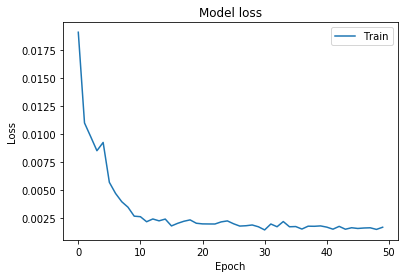

In [23]:
plt.plot(model.history.history['loss'])
#plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.savefig('/kaggle/working/loss.png')
plt.show()

In [24]:
batchonepred = scaled_train[-12:]
batchonepred

array([[0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ],
       [0.63116506],
       [0.82502778],
       [0.75972305]])

In [25]:
batchonepred = batchonepred.reshape((1,class_input,class_feature))

Predict the model with batchonepred variable defined above.

In [26]:
model.predict(batchonepred)

array([[0.9405157]], dtype=float32)

# Time Prediction Using RNN Model

In [27]:
#holding my predictions
test_predictions = []


# last n_input points from the training set
batchonepred = scaled_train[-class_input:]
# reshape this to the format RNN wants (same format as TimeseriesGeneration)
current_batch = batchonepred.reshape((1,class_input,class_feature))

#how far into the future will I forecast?

for i in range(len(testdata)):
    
    # One timestep ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]
    
    #store that prediction
    test_predictions.append(current_pred)
    
    # UPDATE current batch o include prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis= 1)

Generate test predictions and the dtypes=32 for the array elements.

In [28]:
test_predictions

[array([0.9405157], dtype=float32),
 array([1.0453242], dtype=float32),
 array([0.7538715], dtype=float32),
 array([0.919365], dtype=float32),
 array([0.77585566], dtype=float32),
 array([0.8525607], dtype=float32),
 array([0.9095244], dtype=float32),
 array([1.0001423], dtype=float32),
 array([0.55754167], dtype=float32),
 array([0.66510564], dtype=float32),
 array([0.8491652], dtype=float32),
 array([0.8057234], dtype=float32)]

Do a Scalar Inverse transform of the test_predictions variable and store it in the true predictions variable.

In [29]:
true_predictions = scaler.inverse_transform(test_predictions)

In [30]:
true_predictions

array([[14034.09313923],
       [15260.24789011],
       [11850.54268426],
       [13786.65100402],
       [12107.73537147],
       [13005.10761744],
       [13671.5257352 ],
       [14731.6651876 ],
       [ 9553.67997879],
       [10812.07089275],
       [12965.38368869],
       [12457.15839267]])

The testdata of Predictions is equal to true predictions

In [31]:
testdata['Predictions'] =true_predictions

In [32]:
testdata.head()

,Alcohol Sales,Predictions
DATE,,
2018-05-01,14138,14034.093139
2018-06-01,14583,15260.247890
2018-07-01,12640,11850.542684
2018-08-01,14257,13786.651004
2018-09-01,12396,12107.735371


print the newly formatted testdata from the predictions. The variable is a pure merger of current pred and test predictions and is plotted in the block below.

In [33]:
print(testdata)

            Alcohol Sales   Predictions
DATE                                   
2018-05-01          14138  14034.093139
2018-06-01          14583  15260.247890
2018-07-01          12640  11850.542684
2018-08-01          14257  13786.651004
2018-09-01          12396  12107.735371
2018-10-01          13914  13005.107617
2018-11-01          14174  13671.525735
2018-12-01          15504  14731.665188
2019-01-01          10768   9553.679979
2019-02-01          11134  10812.070893
2019-03-01          12653  12965.383689
2019-04-01          13258  12457.158393


A simple plot of testdata to showcase the predictions and actual values on the graph.

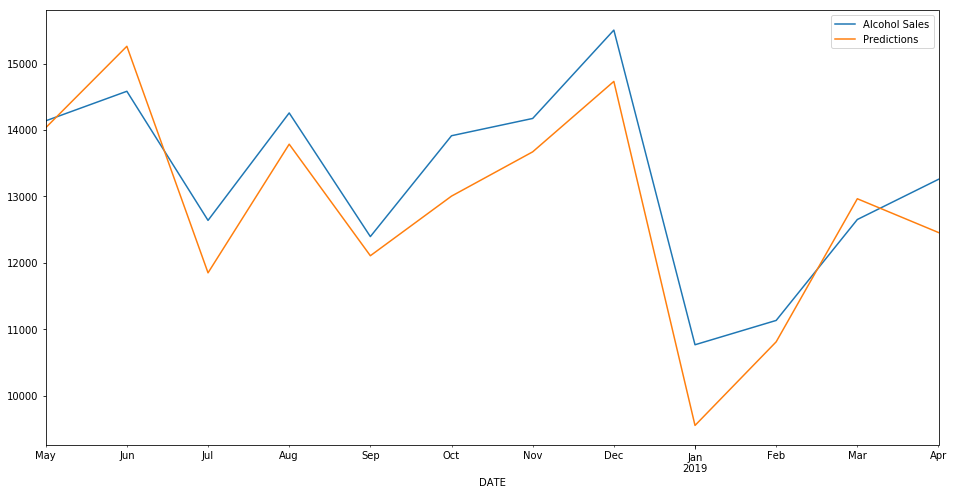

In [35]:
testdata.plot(figsize=(16,8))
plt.savefig('/kaggle/working/finalplot.png')